In [1]:
from feature_selection_utils import *
from supervised_utils import *
from neural_net_utils import *

### Feature selection per il task di regressione

In [2]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la regressione (con MSE 0.43)
best_model = joblib.load("models/Random_Forest_Reg-v2.joblib")

C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


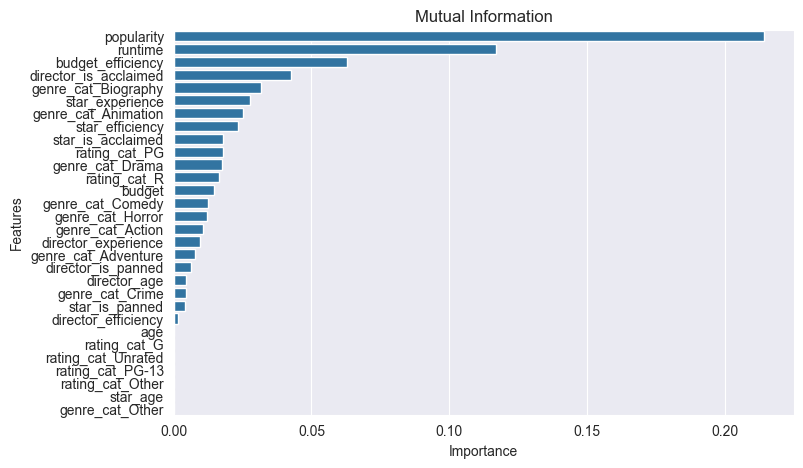

,feature,importance
2,popularity,0.214357
1,runtime,0.117132
4,budget_efficiency,0.062925
7,director_is_acclaimed,0.042621
24,genre_cat_Biography,0.031693
11,star_experience,0.027736
23,genre_cat_Animation,0.025053
14,star_efficiency,0.023490
12,star_is_acclaimed,0.017881
17,rating_cat_PG,0.017768


In [3]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="regression").head(15)

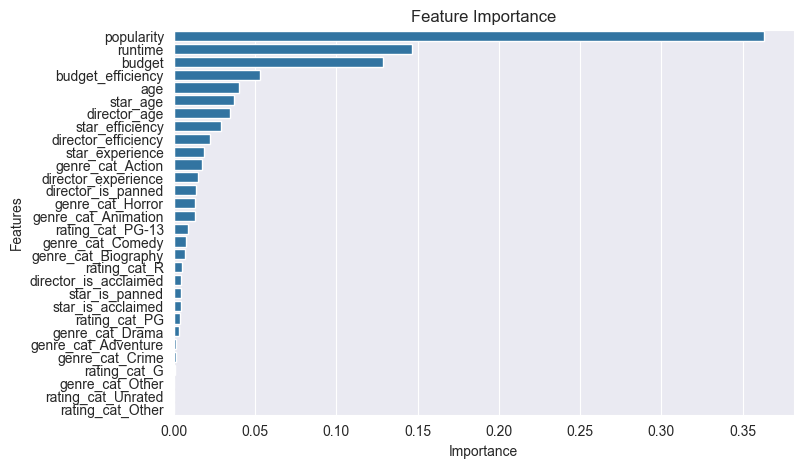

,feature,importance
2,popularity,0.363189
1,runtime,0.146476
3,budget,0.129070
4,budget_efficiency,0.053127
0,age,0.040301
10,star_age,0.036977
5,director_age,0.034802
14,star_efficiency,0.029354
9,director_efficiency,0.022105
11,star_experience,0.018840


In [4]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="regression").head(15)

In [5]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, best_model, k_features=15, task="regression")

+ Added popularity
+ Added runtime
+ Added budget
+ Added age
+ Added genre_cat_Animation
+ Added budget_efficiency
+ Added genre_cat_Action
+ Added genre_cat_Horror
+ Added genre_cat_Biography
+ Added rating_cat_PG-13
+ Added director_is_panned
+ Added genre_cat_Comedy
+ Added genre_cat_Drama
+ Added star_is_acclaimed
+ Added rating_cat_PG


,feature
0,popularity
1,runtime
2,budget
3,age
4,genre_cat_Animation
5,budget_efficiency
6,genre_cat_Action
7,genre_cat_Horror
8,genre_cat_Biography
9,rating_cat_PG-13


#### Sfida con la rete neurale feed-forward (su un sottoinsieme di features)

> TRAINING...

Epoch #1
Train loss: 83697191798883232.0000 | Val loss: 68968822205705.4844

Epoch #2
Train loss: 19893269834022.3789 | Val loss: 2570972412536.0986

Epoch #3
Train loss: 741567444026.5594 | Val loss: 95838903005.2346

Epoch #4
Train loss: 27643640735.4560 | Val loss: 3572618341.1358

Epoch #5
Train loss: 1030480685.7002 | Val loss: 133177415.9012

Epoch #6
Train loss: 38413468.7543 | Val loss: 4964483.2840

Epoch #7
Train loss: 1431941.7624 | Val loss: 185058.4907

Epoch #8
Train loss: 53376.7707 | Val loss: 6897.9708

Epoch #9
Train loss: 1989.4224 | Val loss: 256.9960

Epoch #10
Train loss: 74.0933 | Val loss: 9.5687

Epoch #11
Train loss: 2.7708 | Val loss: 0.3770

Epoch #12
Train loss: 0.1281 | Val loss: 0.0397

Epoch #13
Train loss: 0.0321 | Val loss: 0.0279

Epoch #14
Train loss: 0.0289 | Val loss: 0.0276

Epoch #15
Train loss: 0.0289 | Val loss: 0.0276

Epoch #16
Train loss: 0.0289 | Val loss: 0.0276

Epoch #17
Train loss: 0.0289 | Val loss: 0.0276

Epoch #18
Tra

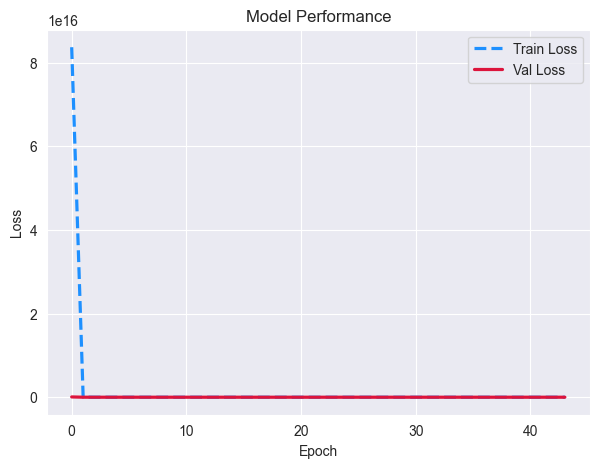

Early stopping at epoch #44.

> TESTING...

Loss: 0.0334



In [6]:
best_features = ["popularity",
                 "runtime",
                 "budget",
                 "age",
                 "budget_efficiency",
                 "director_age",
                 "star_age",
                 "genre_cat_Animation",
                 "genre_cat_Action",
                 "genre_cat_Horror",
                 "rating_cat_PG-13",
                 "director_experience",
                 "star_experience",
                 "director_is_panned",
                 "star_is_panned"]

# training della rete
trainer = Trainer(df, cols, best_features, task="regression")
trainer.fit()

### Feature selection per il task di classificazione

In [7]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "popularity"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la classificazione (con accuracy 53%)
best_model = joblib.load("models/Random_Forest_Cls-v2(resampled).joblib")

C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


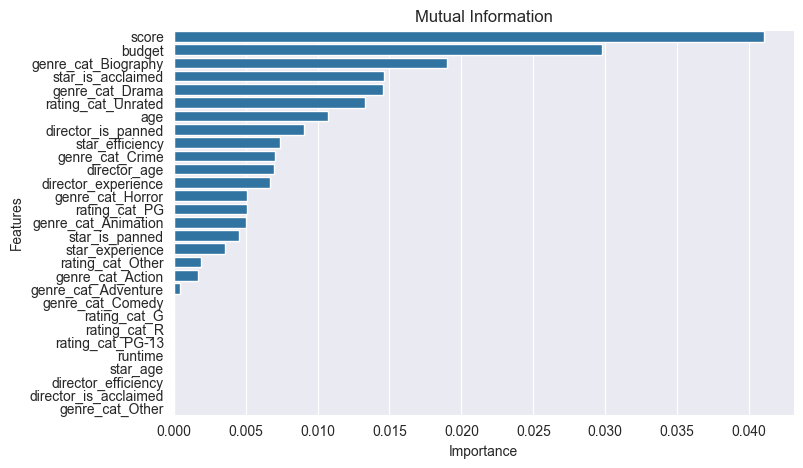

,feature,importance
2,score,0.041045
3,budget,0.029770
23,genre_cat_Biography,0.018998
11,star_is_acclaimed,0.014629
26,genre_cat_Drama,0.014558
19,rating_cat_Unrated,0.013307
0,age,0.010762
7,director_is_panned,0.009034
13,star_efficiency,0.007369
25,genre_cat_Crime,0.007053


In [8]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="classification").head(15)

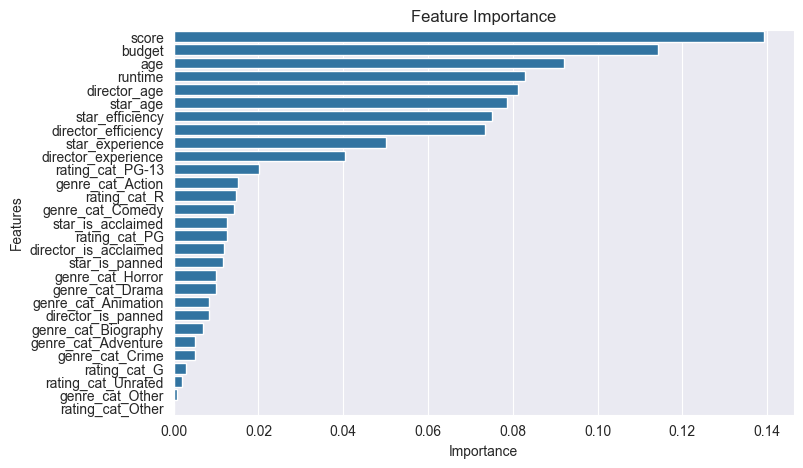

,feature,importance
2,score,0.139269
3,budget,0.114332
0,age,0.092055
1,runtime,0.082936
4,director_age,0.081110
9,star_age,0.078596
13,star_efficiency,0.075167
8,director_efficiency,0.073546
10,star_experience,0.050104
5,director_experience,0.040463


In [9]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="classification").head(15)

In [10]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, best_model, k_features=15, task="classification")

+ Added score
+ Added genre_cat_Horror
+ Added rating_cat_R
+ Added age
+ Added budget
+ Added genre_cat_Comedy
+ Added genre_cat_Action
+ Added rating_cat_Unrated
+ Added star_is_panned
+ Added rating_cat_Other
+ Added genre_cat_Animation
+ Added director_experience
+ Added rating_cat_PG
+ Added star_is_acclaimed
+ Added genre_cat_Biography


,feature
0,score
1,genre_cat_Horror
2,rating_cat_R
3,age
4,budget
5,genre_cat_Comedy
6,genre_cat_Action
7,rating_cat_Unrated
8,star_is_panned
9,rating_cat_Other


#### Sfida con la rete neurale feed-forward (su un sottoinsieme di features)

In [11]:
best_features = ["score",
                 "runtime",
                 "budget",
                 "age",
                 "director_age",
                 "star_age",
                 "director_efficiency",
                 "star_efficiency",
                 "director_experience",
                 "star_experience",
                 "genre_cat_Comedy",
                 "genre_cat_Drama",
                 "genre_cat_Horror",
                 "rating_cat_PG-13",
                 "rating_cat_R"]

# training della rete
trainer = Trainer(df, cols, best_features, task="classification", resample=False)
trainer.fit()

> TRAINING...

Epoch #1
Train accuracy: 35.94% | Val accuracy: 36.42%

Epoch #2
Train accuracy: 37.87% | Val accuracy: 36.27%

Epoch #3
Train accuracy: 38.79% | Val accuracy: 36.73%

Epoch #4
Train accuracy: 39.14% | Val accuracy: 36.88%

Epoch #5
Train accuracy: 39.03% | Val accuracy: 37.04%

Epoch #6
Train accuracy: 39.41% | Val accuracy: 37.96%

Epoch #7
Train accuracy: 39.06% | Val accuracy: 36.42%

Epoch #8
Train accuracy: 39.34% | Val accuracy: 38.27%

Epoch #9
Train accuracy: 38.64% | Val accuracy: 36.42%

Epoch #10
Train accuracy: 39.49% | Val accuracy: 36.57%

Epoch #11
Train accuracy: 40.15% | Val accuracy: 35.96%

Epoch #12
Train accuracy: 39.45% | Val accuracy: 36.88%

Epoch #13
Train accuracy: 40.34% | Val accuracy: 36.11%

Epoch #14
Train accuracy: 39.68% | Val accuracy: 37.81%

Epoch #15
Train accuracy: 39.72% | Val accuracy: 37.65%

Epoch #16
Train accuracy: 39.64% | Val accuracy: 36.88%

Epoch #17
Train accuracy: 40.42% | Val accuracy: 37.50%

Epoch #18
Train accuracy: